In [10]:
# On utilise pyplot pour faire des graphes
%matplotlib inline
import matplotlib.pyplot as plt
# Pour faire des calculs et générer des nombres aléatoires on utilise numpy
import numpy as np
# Pour faire des stats on utilise seaborn
import seaborn as sns
sns.set()

# 1. Générer des nombres aléatoires
## 1.1. Tirage aléatoire uniforme (0, 1)

In [2]:
np.random.uniform()

0.04725195728309006

## 1.2. Pile ou face

In [3]:
np.random.choice(['pile', 'face'], p=[0.1,0.9])

'face'

In [12]:
# On lance 100 pile ou face pour voir combien de pile on obtient
y = 0
for i in range(0,100):
    if np.random.choice(['pile', 'face']) == 'pile':
        y = y + 1
        
print(y)

47


In [16]:
# On peut également demander à la méthode choice() de faire plusieurs lancers
np.sum(np.random.choice(['pile', 'face'], size=100) == 'pile')

57

In [24]:
# On peut également en faire une fonction (p permet de plomber la pièce, voir plus bas)
def nb_piles(nb_tirage=100, p=None):
    return np.sum(np.random.choice(['pile', 'face'], size=nb_tirage, p=p) == 'pile')
    
for i in range(5):
    print(nb_piles())

49
64
56
44
46


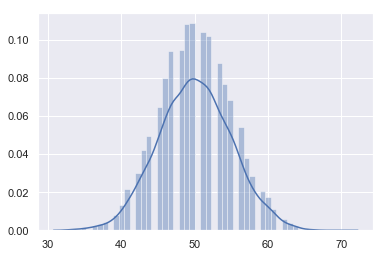

In [25]:
# On va générer une courbe pour voir la répartition des tirages
stats = [nb_piles() for i in range(10000)]

sns.distplot(stats)

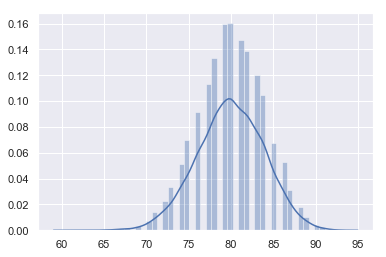

In [26]:
# On va générer une autre courbe pour voir la répartition des tirages en cas de pièce plombée (80%-20%)
stats = [nb_piles(p=[0.8, 0.2]) for i in range(10000)]

sns.distplot(stats)

## 1.3. Loi uniforme

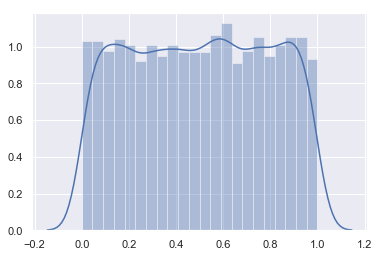

In [28]:
# On effectue 10000 tirages aléatoires et on génère un graphe à partir des résultats
stats = np.random.uniform(size=10000)
sns.distplot(stats)

## 1.4. Loi exponentielle

In [30]:
# Cela représente le temps entre deux requêtes à un serveur
np.random.exponential(size=5)

array([0.53684817, 0.93799375, 0.2107074 , 0.53437207, 1.04962229])

In [74]:
tempsCalcul = 1.0
stats = []

def temps_attente(n):
    if n == 0:
        stats.append(tempsCalcul)
        return tempsCalcul
    temps = np.random.exponential()
    if temps > tempsCalcul:
        res = tempsCalcul + max(temps_attente(n - 1) - temps, 0)
    else:
        res = temps_attente(n - 1) + tempsCalcul - temps
    stats.append(res)
    return res

temps_attente(100)

6.01356388459225

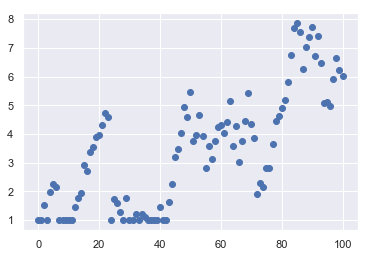

In [75]:
# On fait un graphe avec les résultats
plt.scatter(range(len(stats)), stats)

# 2. Régression (dans un but de prévision)

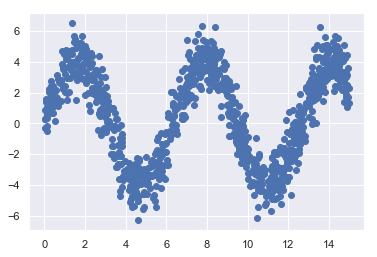

In [110]:
# On va tracer un graphe sinusoïdal
nb = 1000

# Le random ajoute du "bruit" aux données
x = np.random.uniform(low = 0.0, high = 15.0, size = nb)
y = 4.0 * np.sin(x) + np.random.normal(size = nb)

plt.scatter(x, y)

In [111]:
# On importe la lib de régression linéaire de SciKit
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# On définit X et y
X = x.reshape(-1, 1)
y = y

# On éclate le jeu de données en entrainement/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Instanciation du regresseur
reg = LinearRegression()

# Apprentissage
reg.fit(X_train, y_train)
# Prédiction
y_pred = reg.predict(X_test)

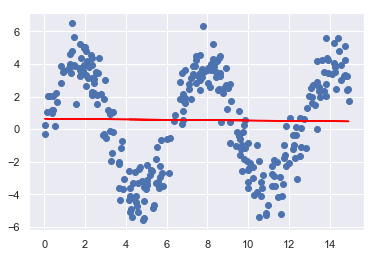

In [112]:
# On fait un graphe
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color = 'red')

In [113]:
# Calcul du R2 Score
from sklearn.metrics import r2_score

In [114]:
# Le r2_score est théoriquement entre 0 et 1, il peut être négatif si la regression est vraiment nulle
print(r2_score(y_test, y_pred))

-1.8261850744494268e-05


Le score est négatif, par conséquent l'algo utilisé est vraiment inadapté à la problématique

In [115]:
# On importe un autre algo de régression
from sklearn.svm import SVR

C:\Users\Xepyon\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


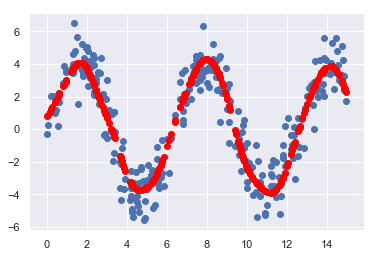

In [116]:
# Instanciation du regresseur
reg = SVR()

# Apprentissage
reg.fit(X_train, y_train)
# Prédicition
y_pred = reg.predict(X_test)

# Graphe
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, color = 'red')

In [117]:
# On calcule r2_score
print(r2_score(y_test, y_pred))

0.873221856899737


Le score est de 0.8732, soit 87.22% de pertinence des réponses par rapport aux prédicitions

In [118]:
# On fait la même chose avec l'algo des plus proches voisins (KNeighborsClassifier)
from sklearn.neighbors import KNeighborsRegressor

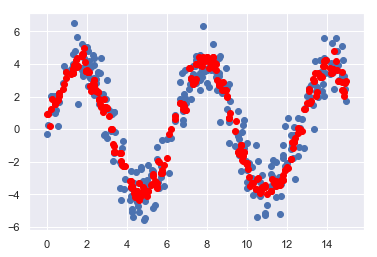

In [119]:
# Instanciation du regresseur
reg = KNeighborsRegressor()

# Apprentissage
reg.fit(X_train, y_train)
# Prédicition
y_pred = reg.predict(X_test)

# Graphe
plt.scatter(X_test, y_test)
plt.scatter(X_test, y_pred, color = 'red')

In [120]:
# On calcule r2_score
print(r2_score(y_test, y_pred))

0.8553830851985544


Le r2_score est de 0.8553, ce qui correspond à 85.53% de pertinence des réponses par rapport aux prédictions

In [134]:
# On crée une fonction qui automatise les tests précédents
def score_func(X, y, reg, nb_splits = 10):
    scores = []
    for i in range(nb_splits):
        # On recrée un jeu de données d'entrainement/test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
        # Apprentissage
        reg.fit(X_train, y_train)
        # Prédiction
        y_pred = reg.predict(X_test)
        # On ajoute la prédiciton à l'array des scores
        scores.append(r2_score(y_test, y_pred))
    return scores

(0, 1)

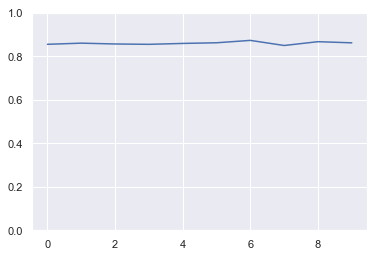

In [137]:
# On trace un graphe avec les résultats obtenus
stats = score_func(X, y, reg)
plt.plot(stats)
plt.ylim(0, 1)

## 3. Données réelles
Données issues d'une compétition Kaggle sur les prix de l'immobilier à San Francisco

In [32]:
import pandas as pd

In [33]:
# On importe les données
url = "https://tinyurl.com/y2fm4but"

In [35]:
# On crée le DataFrame à partir de l'url avec read_csv
df = pd.read_csv(url)
df.info()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1211,1212,50,RL,152.0,12134,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2010,WD,Normal,164000
539,540,20,RL,NaN,11423,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,2000,5,2010,WD,Normal,272000
1111,1112,60,RL,80.0,10480,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,205000
627,628,80,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2010,WD,Normal,153000
243,244,160,RL,75.0,10762,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,120000


[(0, 1)]

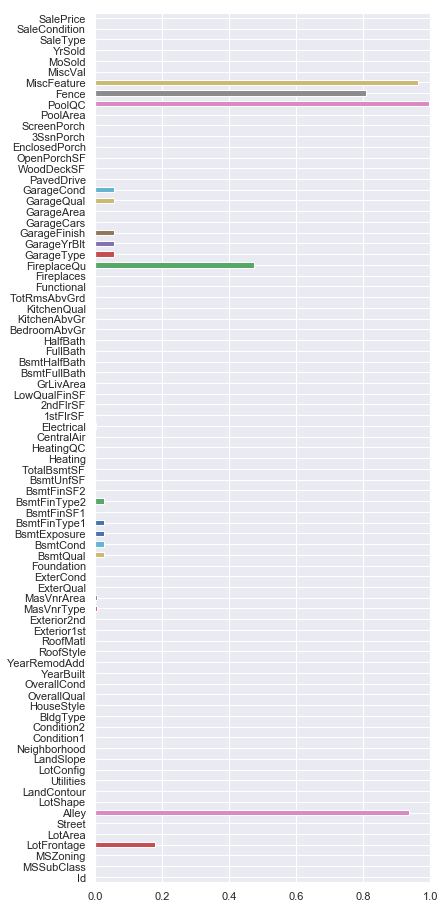

In [36]:
# On va faire une exploration des données pour voir quel pourcentage de valeurs vides par colonne
_, ax = plt.subplots(figsize=(6, 16))

df.isnull().mean().plot.barh(ax=ax)

ax.set(xlim=(0, 1))

## 3.1. Traitement des valeurs
1. Si la colonne contient plus de 20% de valeurs vides on la retire,
2. Remplacement de Garage et sous-sol (bsmt) par NA,
3. Remplacement de LotFrontage par 0,
4. On retire les 8 lignes MasVnrXXX

In [37]:
# Virer des colonnes vides
for col in df.columns:
    if df[col].isnull().mean() > 0.2:
        df = df.drop(columns = [col])
        
# On peut aussi faire df = df.dropna(axis='columns', thresh=0.8 * len(df))

In [38]:
# Garage et sous-sol (bsmt), on remplace les vides par "NA"
cols = [
    col for col in df.columns
    if col.startswith('Bsmt') or col.startswith('Garage')
]
df.loc[:, cols] = df.loc[:, cols].fillna("NA")

In [39]:
# LotFrontage : on remplace les cellules vides par 0
df.loc[:, ['LotFrontage']] = df.loc[:, ['LotFrontage']].fillna(0.0)